# Visualziation of predicted cell proportions in HGSOC Schildkraut data

This notebook visualizes the InstaPrism-predicted cell-type composition of the Schildkraut high-grade serous ovarian carcinoma (HGSOC) cohort. After loading the processed cell-fraction tables and metadata, individual cell types are consolidated into broader categories (Immune, Stromal, Adipocytes, Epithelial) and their distributions are explored through box-plots. Finally, Spearman and Pearson correlation matrices are generated—both for grouped categories and for all individual cell types—to highlight relationships among cellular compartments across samples.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import sys 

pd.set_option("display.max_rows", 100)
sns.set_style("ticks")

sys.path.insert(1, '../../')
sys.path.insert(1, '../')

import src.hp as hp

np.random.seed(88)

In [ ]:
fractions = ["Epithelial", "Stromal","Immune","Adipocytes"]

## Load InstaPrism cell-fraction tables

Proportions

In [3]:
base_path = os.path.dirname(os.getcwd())

props = pd.read_csv(os.path.join(base_path, "input_data/proportions_sch.csv"), index_col=0)
props_all = props.copy()
props_all.drop(columns=["SampleID", "Dataset", "suid", "ID"], inplace=True)
props_all

,Plasma cells,B cells,Endothelial cells,T cells,Monocytes,Fibroblasts,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes
0,4.919765e-49,0.052767,0.029870,1.833554e-26,1.727071e-60,7.074672e-105,8.375315e-10,0.746341,1.257780e-139,3.590420e-30,2.867046e-78,1.185148e-02,1.538137e-57,0.0,0.159171
1,9.351753e-92,0.027159,0.011666,5.972580e-66,2.258210e-157,8.180384e-107,8.135649e-61,0.848153,3.276474e-210,2.054386e-103,1.247009e-85,2.337775e-128,1.452291e-115,0.0,0.113022
2,6.998799e-32,0.014663,0.041547,1.004614e-23,3.232466e-34,1.225464e-02,9.550579e-19,0.819028,1.104356e-115,3.157063e-69,7.123720e-41,2.994756e-02,1.850941e-63,0.0,0.082561
3,2.410384e-97,0.162711,0.022343,2.056824e-52,5.485488e-33,2.751866e-120,7.904174e-39,0.642545,4.774011e-154,1.326676e-75,2.334007e-77,1.516542e-02,1.488048e-80,0.0,0.157235
4,3.439318e-76,0.050581,0.055021,5.687981e-28,5.314872e-52,8.961526e-02,2.919113e-22,0.649017,7.625379e-122,1.873123e-52,3.487465e-81,1.419715e-02,4.216693e-41,0.0,0.141568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.442627e-108,0.136578,0.014420,3.410104e-30,3.267116e-82,7.666630e-23,1.501224e-35,0.710289,6.509988e-151,4.903142e-78,8.571710e-105,3.473745e-03,5.671299e-79,0.0,0.135240
584,1.359916e-92,0.190881,0.017396,5.383974e-33,2.734703e-86,1.156925e-02,1.945285e-24,0.592805,1.063562e-147,5.374615e-82,8.551669e-96,1.270617e-02,4.370517e-04,0.0,0.174205
585,7.862780e-79,0.102850,0.053137,8.610293e-03,1.076987e-46,4.237821e-02,1.467756e-05,0.656171,3.397744e-114,5.089409e-39,1.625064e-79,2.253584e-02,9.865474e-05,0.0,0.114204
586,1.245316e-60,0.127050,0.034344,1.345753e-16,5.846372e-04,2.787547e-02,2.169830e-04,0.673204,4.422809e-95,4.998254e-48,3.881728e-35,5.796692e-04,4.236351e-47,0.0,0.136146


In [ ]:
## Now our three groups:
cell_types_to_use_grouped = ["B cells",
                         'Mast cells',
                        'T cells',
                        'Monocytes',
                        'Plasma cells',
                        "NK cells", 
                        "DC",
                        "pDC",  
                        "Macrophages", 
                        "ILC"]

props = hp.group_cts(cell_types_to_use_grouped = ["B cells",
                         'Mast cells',
                        'T cells',
                        'Monocytes',
                        'Plasma cells',
                        "NK cells", 
                        "DC",
                        "pDC",  
                        "Macrophages", 
                        "ILC"], name="Immune", props=props)

props = hp.group_cts(cell_types_to_use_grouped = ["Fibroblasts",
                        'Endothelial cells'], name="Stromal", props=props)

props = hp.group_cts(cell_types_to_use_grouped = ["Epithelial cells"], name="Epithelial", props=props)
props = hp.group_cts(cell_types_to_use_grouped = ["Adipocytes",], name="Adipocytes", props=props)

props.drop(columns=["SampleID", "Dataset", "suid", "ID"], inplace=True)
props = props[fractions].copy() 

props

,Epithelial,Stromal,Immune,Adipocytes
0,0.746341,0.029870,0.064619,0.159171
1,0.848153,0.011666,0.027159,0.113022
2,0.819028,0.053801,0.044610,0.082561
3,0.642545,0.022343,0.177877,0.157235
4,0.649017,0.144637,0.064779,0.141568
...,...,...,...,...
583,0.710289,0.014420,0.140051,0.135240
584,0.592805,0.028965,0.204024,0.174205
585,0.656171,0.095516,0.134109,0.114204
586,0.673204,0.062219,0.128431,0.136146


## Visualizations of proportions

In [5]:
# list in the exact order you want
desired_order = [
    "Epithelial cells", "Erythroid", "Fibroblasts",
    "Endothelial cells", "B cells", "Mast cells", "T cells",
    "Monocytes", "Plasma cells", "NK cells", "DC", "pDC",
    "Macrophages", "ILC", "Adipocytes"
]

# --- reorder -----------------------------------------------------------
# • keep the listed columns in the specified order
# • silently skip any names that are NOT in the DataFrame
# • append any *extra* columns that are in `props_all` but not in your list
ordered_cols = (
    [c for c in desired_order if c in props_all.columns] +
    [c for c in props_all.columns if c not in desired_order]
)

props_all = props_all[ordered_cols]        # re-index columns
props_all

,Epithelial cells,Erythroid,Fibroblasts,Endothelial cells,B cells,Mast cells,T cells,Monocytes,Plasma cells,NK cells,DC,pDC,Macrophages,ILC,Adipocytes
0,0.746341,0.0,7.074672e-105,0.029870,0.052767,1.538137e-57,1.833554e-26,1.727071e-60,4.919765e-49,8.375315e-10,1.257780e-139,3.590420e-30,1.185148e-02,2.867046e-78,0.159171
1,0.848153,0.0,8.180384e-107,0.011666,0.027159,1.452291e-115,5.972580e-66,2.258210e-157,9.351753e-92,8.135649e-61,3.276474e-210,2.054386e-103,2.337775e-128,1.247009e-85,0.113022
2,0.819028,0.0,1.225464e-02,0.041547,0.014663,1.850941e-63,1.004614e-23,3.232466e-34,6.998799e-32,9.550579e-19,1.104356e-115,3.157063e-69,2.994756e-02,7.123720e-41,0.082561
3,0.642545,0.0,2.751866e-120,0.022343,0.162711,1.488048e-80,2.056824e-52,5.485488e-33,2.410384e-97,7.904174e-39,4.774011e-154,1.326676e-75,1.516542e-02,2.334007e-77,0.157235
4,0.649017,0.0,8.961526e-02,0.055021,0.050581,4.216693e-41,5.687981e-28,5.314872e-52,3.439318e-76,2.919113e-22,7.625379e-122,1.873123e-52,1.419715e-02,3.487465e-81,0.141568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.710289,0.0,7.666630e-23,0.014420,0.136578,5.671299e-79,3.410104e-30,3.267116e-82,1.442627e-108,1.501224e-35,6.509988e-151,4.903142e-78,3.473745e-03,8.571710e-105,0.135240
584,0.592805,0.0,1.156925e-02,0.017396,0.190881,4.370517e-04,5.383974e-33,2.734703e-86,1.359916e-92,1.945285e-24,1.063562e-147,5.374615e-82,1.270617e-02,8.551669e-96,0.174205
585,0.656171,0.0,4.237821e-02,0.053137,0.102850,9.865474e-05,8.610293e-03,1.076987e-46,7.862780e-79,1.467756e-05,3.397744e-114,5.089409e-39,2.253584e-02,1.625064e-79,0.114204
586,0.673204,0.0,2.787547e-02,0.034344,0.127050,4.236351e-47,1.345753e-16,5.846372e-04,1.245316e-60,2.169830e-04,4.422809e-95,4.998254e-48,5.796692e-04,3.881728e-35,0.136146


In [6]:
props_all[["B cells", "Mast cells", "T cells",
    "Monocytes", "Plasma cells", "NK cells", "DC", "pDC",
    "Macrophages", "ILC"]]

,B cells,Mast cells,T cells,Monocytes,Plasma cells,NK cells,DC,pDC,Macrophages,ILC
0,0.052767,1.538137e-57,1.833554e-26,1.727071e-60,4.919765e-49,8.375315e-10,1.257780e-139,3.590420e-30,1.185148e-02,2.867046e-78
1,0.027159,1.452291e-115,5.972580e-66,2.258210e-157,9.351753e-92,8.135649e-61,3.276474e-210,2.054386e-103,2.337775e-128,1.247009e-85
2,0.014663,1.850941e-63,1.004614e-23,3.232466e-34,6.998799e-32,9.550579e-19,1.104356e-115,3.157063e-69,2.994756e-02,7.123720e-41
3,0.162711,1.488048e-80,2.056824e-52,5.485488e-33,2.410384e-97,7.904174e-39,4.774011e-154,1.326676e-75,1.516542e-02,2.334007e-77
4,0.050581,4.216693e-41,5.687981e-28,5.314872e-52,3.439318e-76,2.919113e-22,7.625379e-122,1.873123e-52,1.419715e-02,3.487465e-81
...,...,...,...,...,...,...,...,...,...,...
583,0.136578,5.671299e-79,3.410104e-30,3.267116e-82,1.442627e-108,1.501224e-35,6.509988e-151,4.903142e-78,3.473745e-03,8.571710e-105
584,0.190881,4.370517e-04,5.383974e-33,2.734703e-86,1.359916e-92,1.945285e-24,1.063562e-147,5.374615e-82,1.270617e-02,8.551669e-96
585,0.102850,9.865474e-05,8.610293e-03,1.076987e-46,7.862780e-79,1.467756e-05,3.397744e-114,5.089409e-39,2.253584e-02,1.625064e-79
586,0.127050,4.236351e-47,1.345753e-16,5.846372e-04,1.245316e-60,2.169830e-04,4.422809e-95,4.998254e-48,5.796692e-04,3.881728e-35


/Users/ivicha/Documents/HGSOC_Adipocytes/notebooks/../src/hp.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


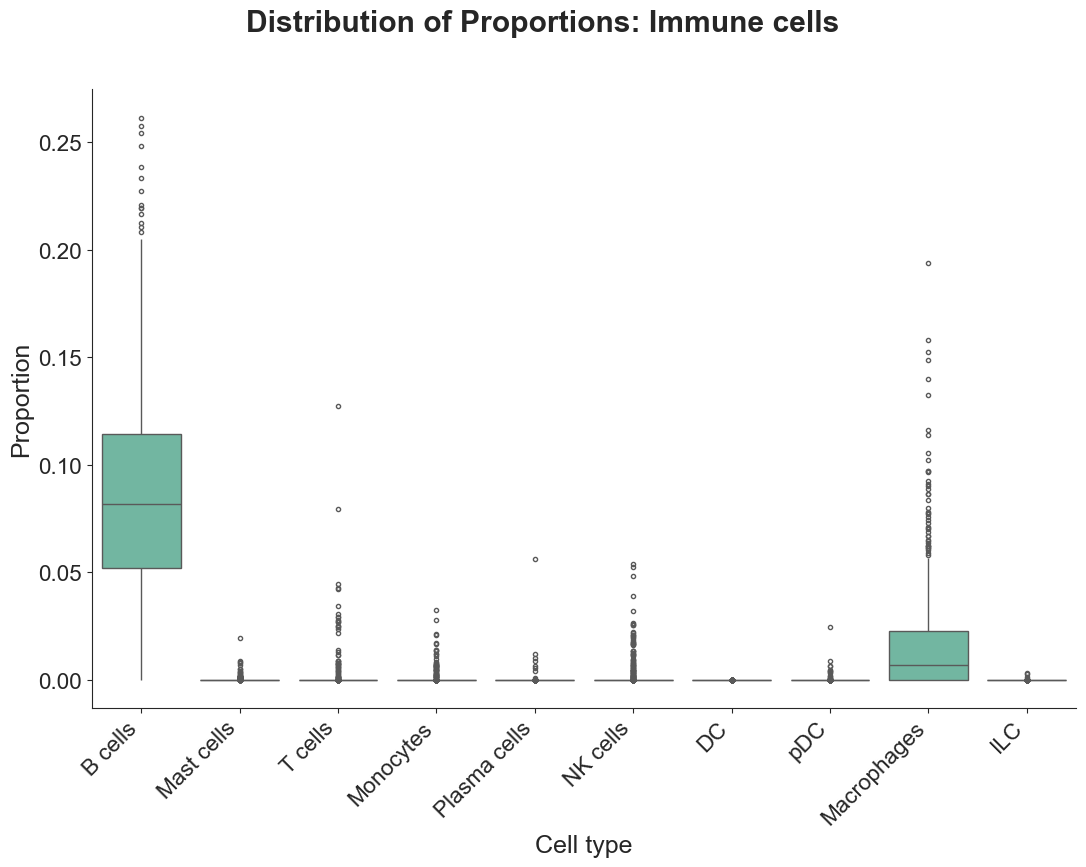

/Users/ivicha/Documents/HGSOC_Adipocytes/notebooks/../src/hp.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


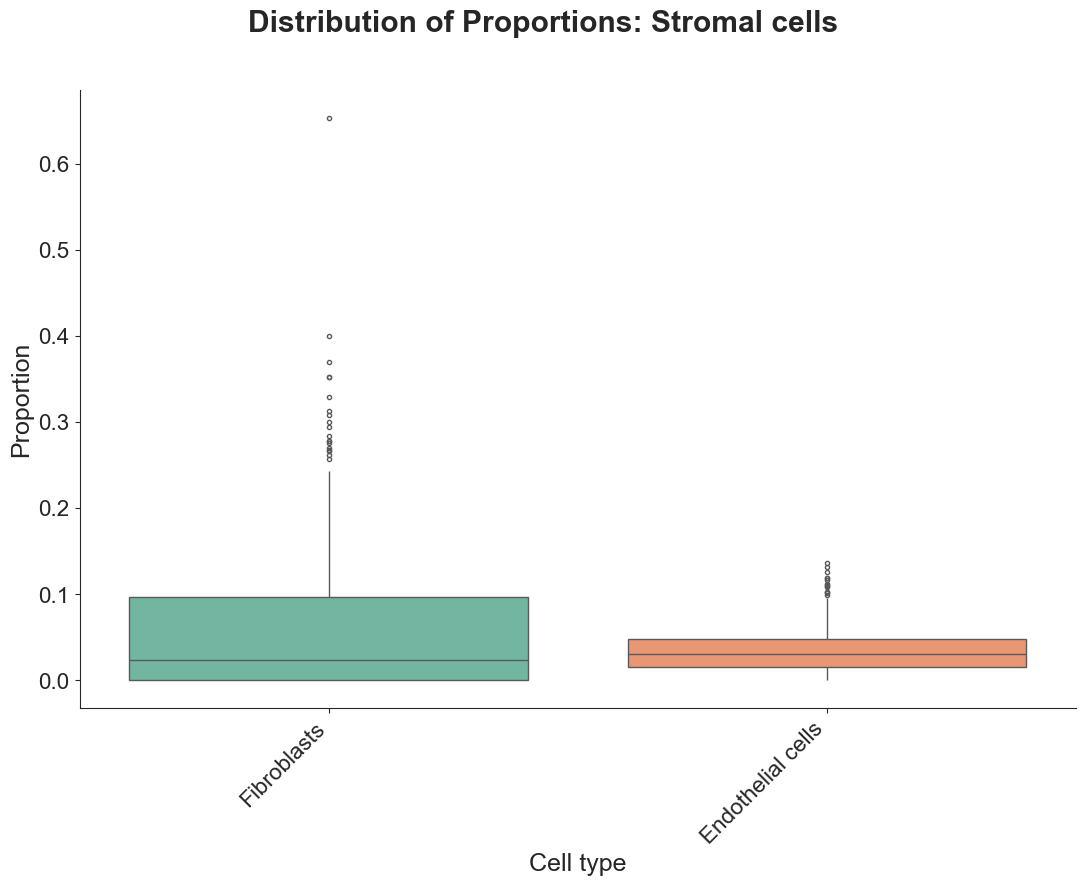

/Users/ivicha/Documents/HGSOC_Adipocytes/notebooks/../src/hp.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


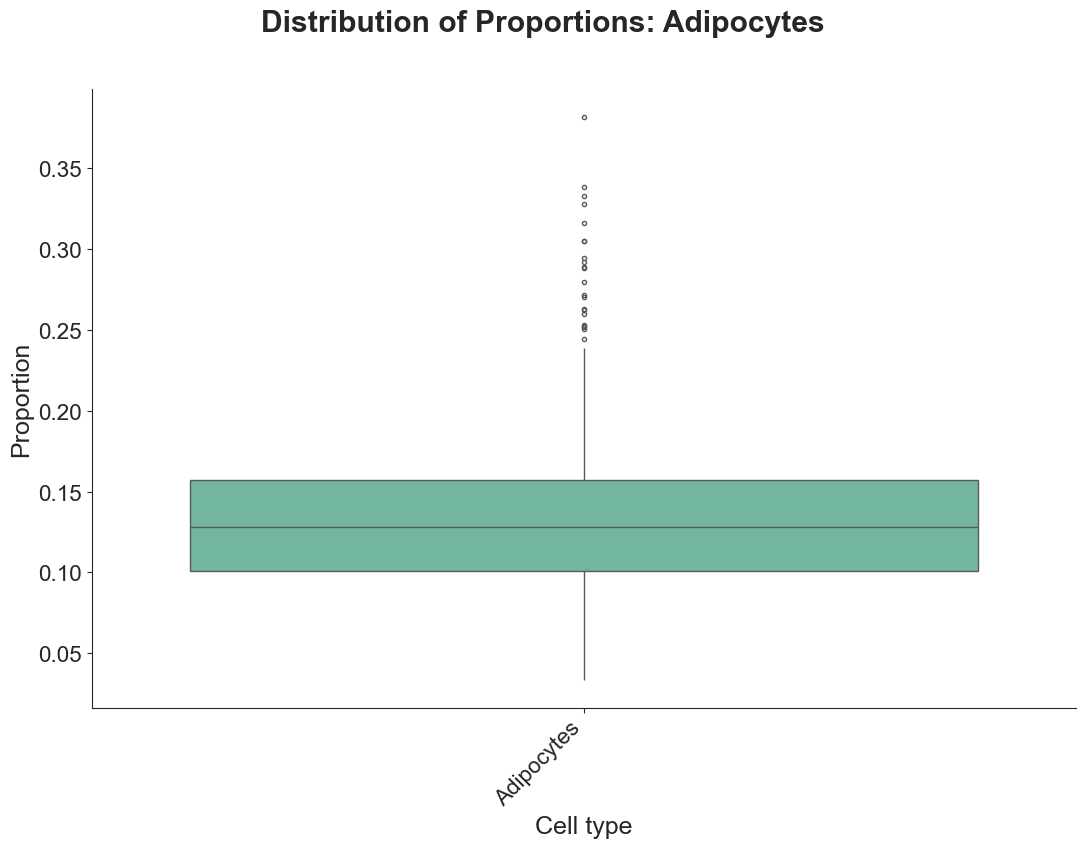

/Users/ivicha/Documents/HGSOC_Adipocytes/notebooks/../src/hp.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


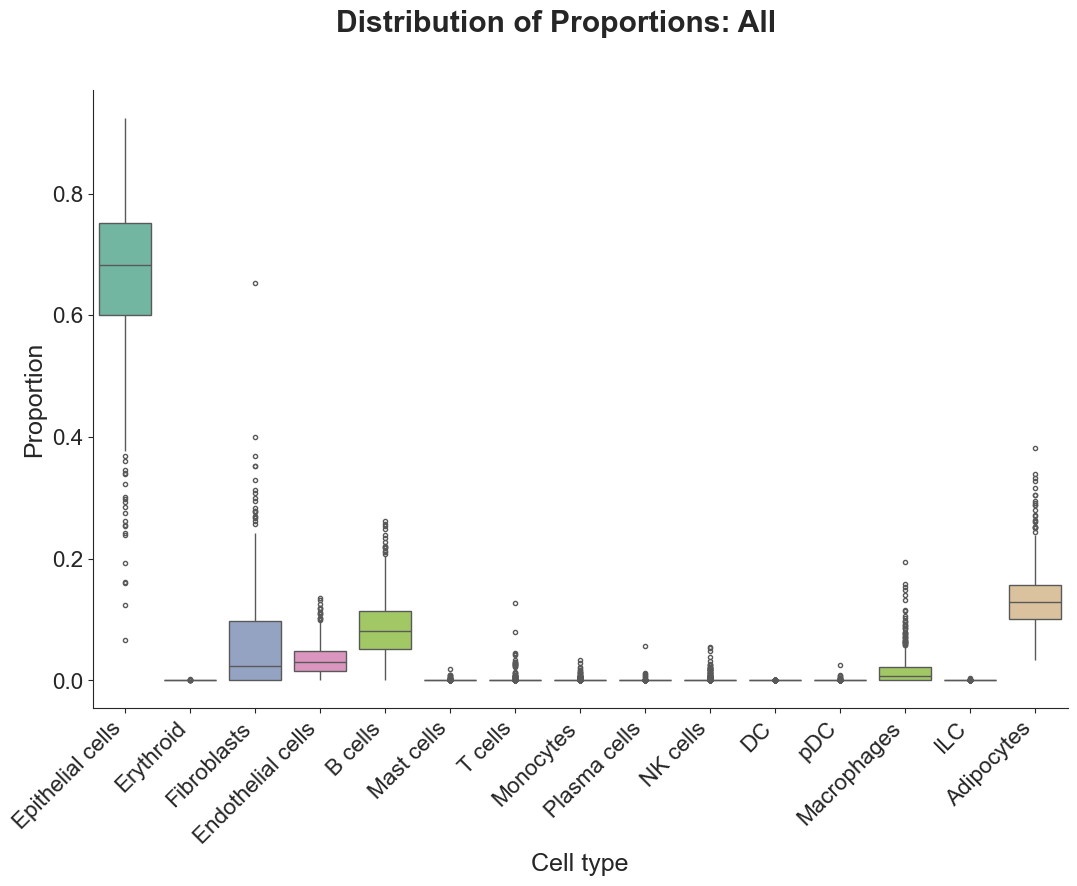

In [7]:
# --------------------------------------------------------------------------
# 1.  Distribution of each cell-type fraction  (facet-wrapped box-plots)
# --------------------------------------------------------------------------

hp.plot_distributions(props_all[["B cells", "Mast cells", "T cells",
    "Monocytes", "Plasma cells", "NK cells", "DC", "pDC",
    "Macrophages", "ILC"]], title="Immune cells")

hp.plot_distributions(props_all[["Fibroblasts", "Endothelial cells"]], title="Stromal cells")
hp.plot_distributions(props_all[["Adipocytes"]], title="Adipocytes")
hp.plot_distributions(props_all, title="All")

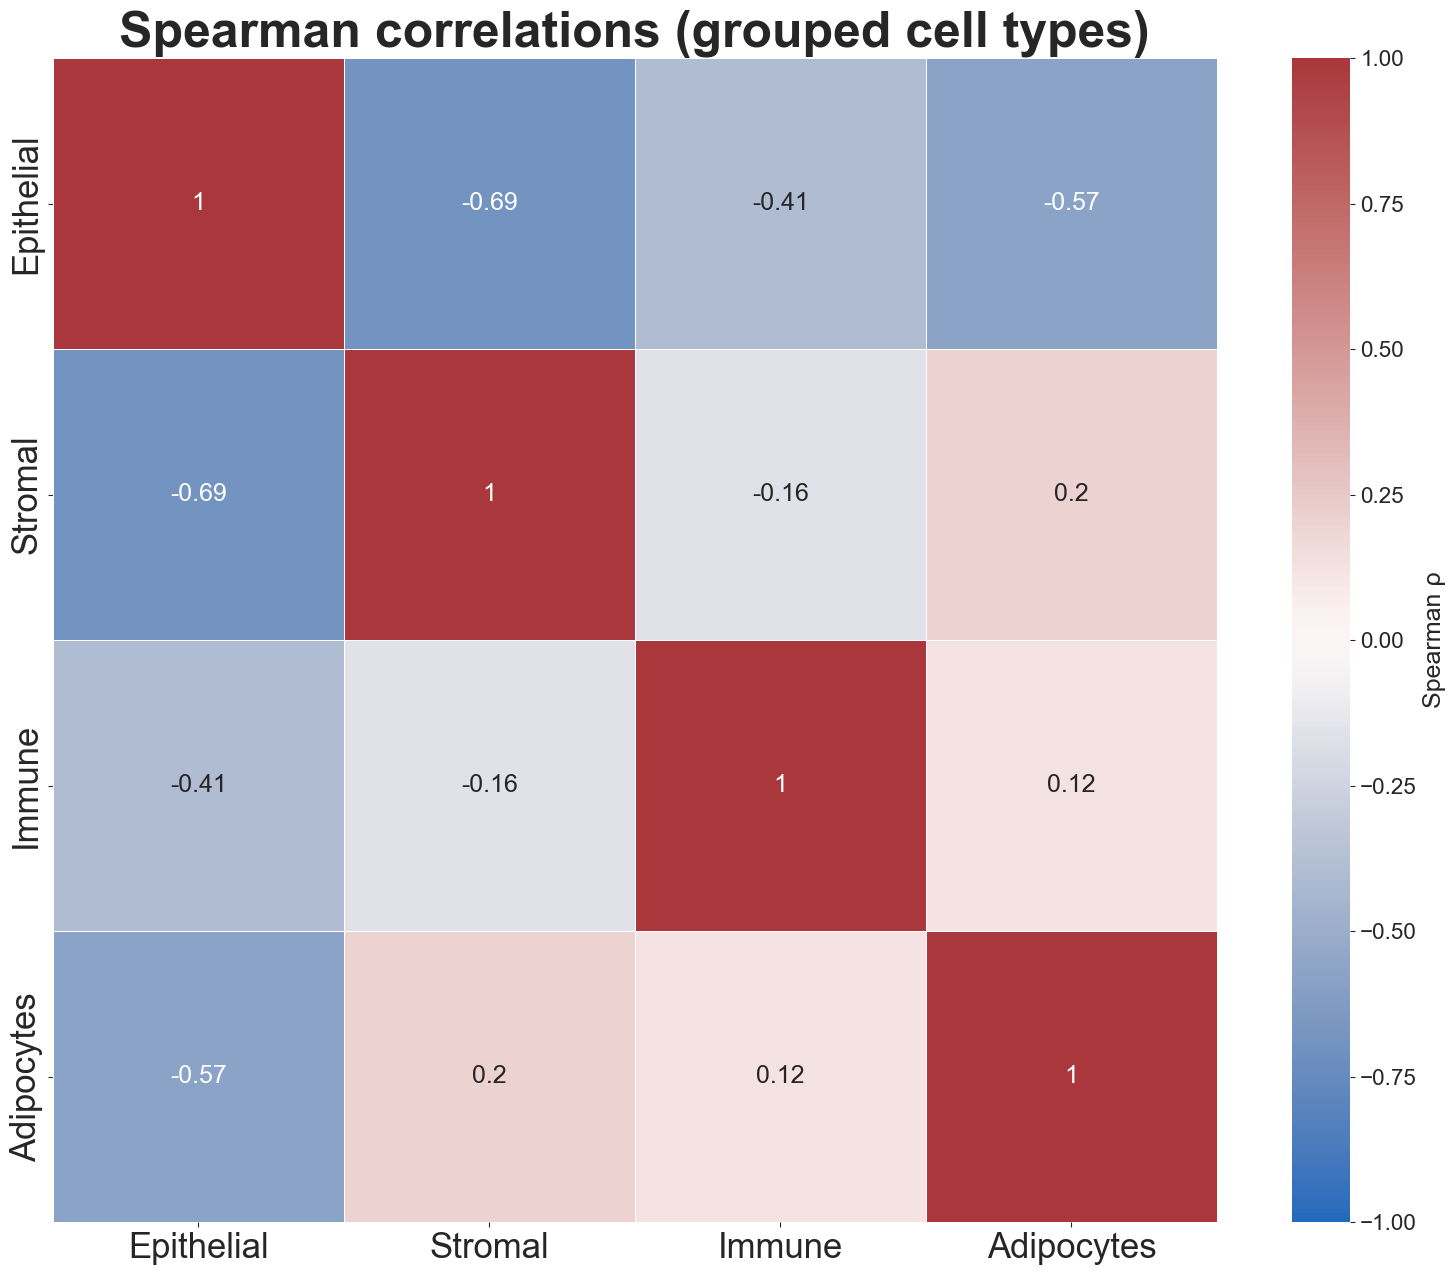

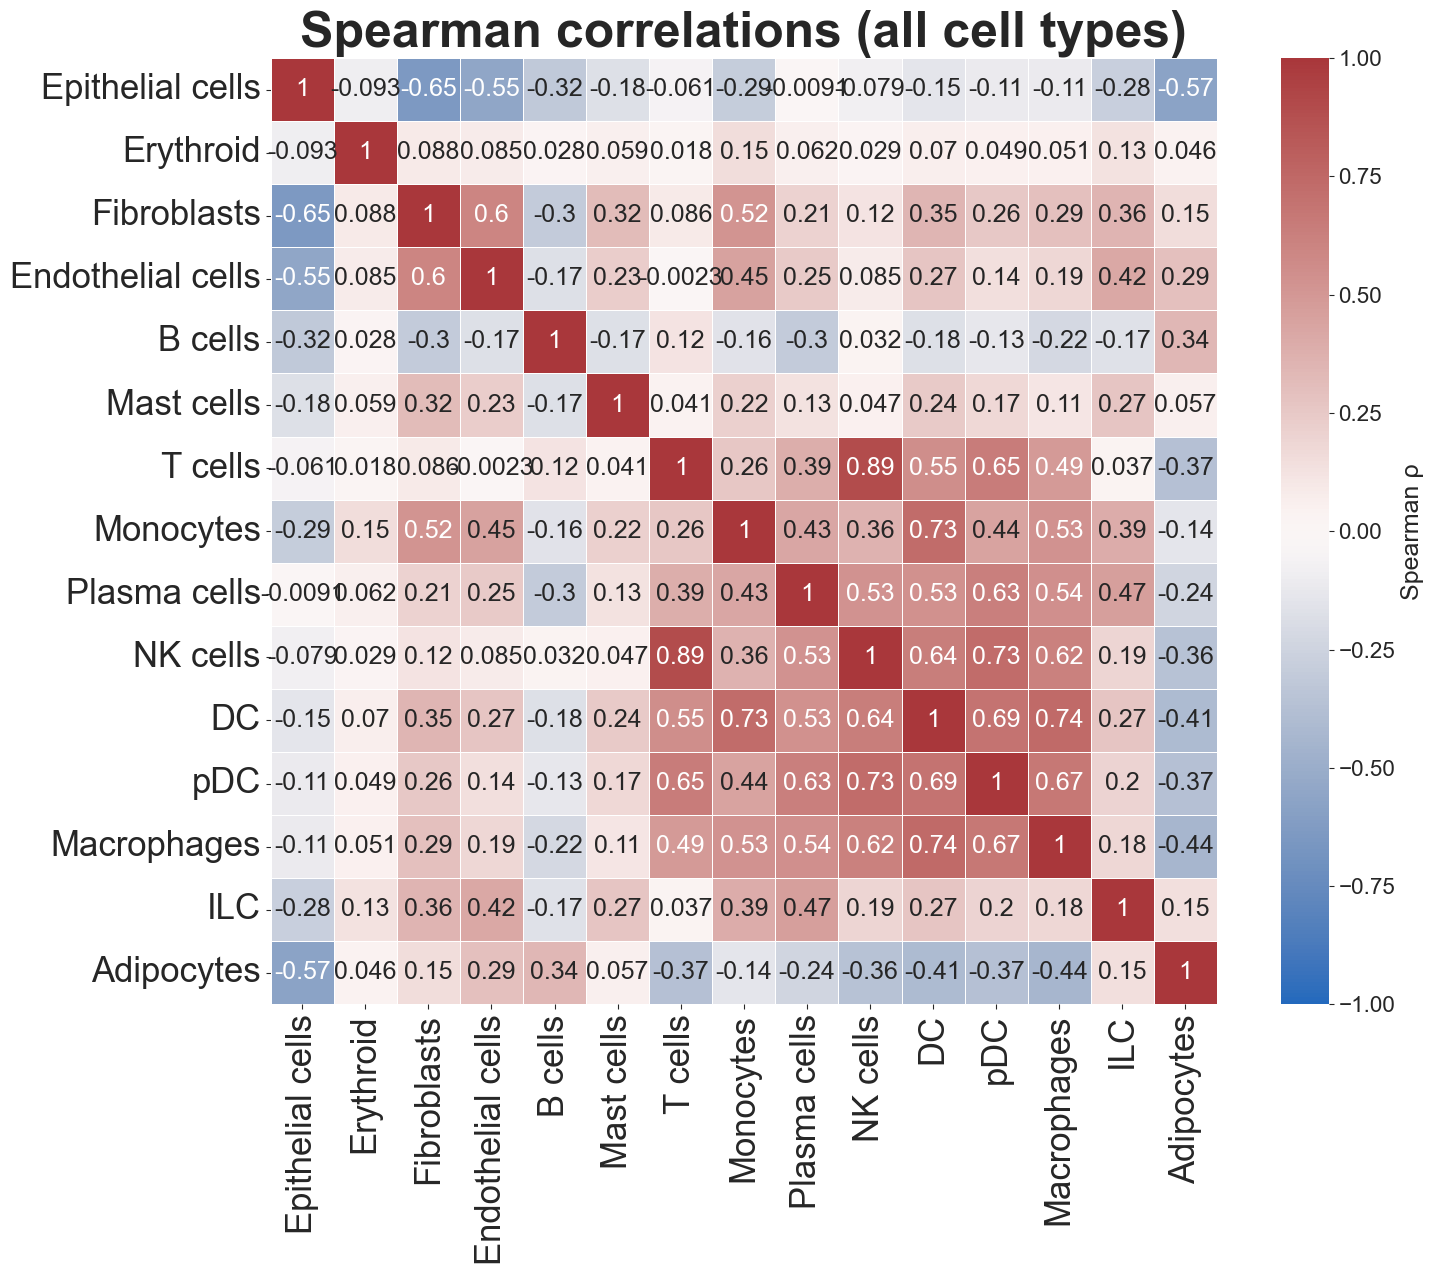

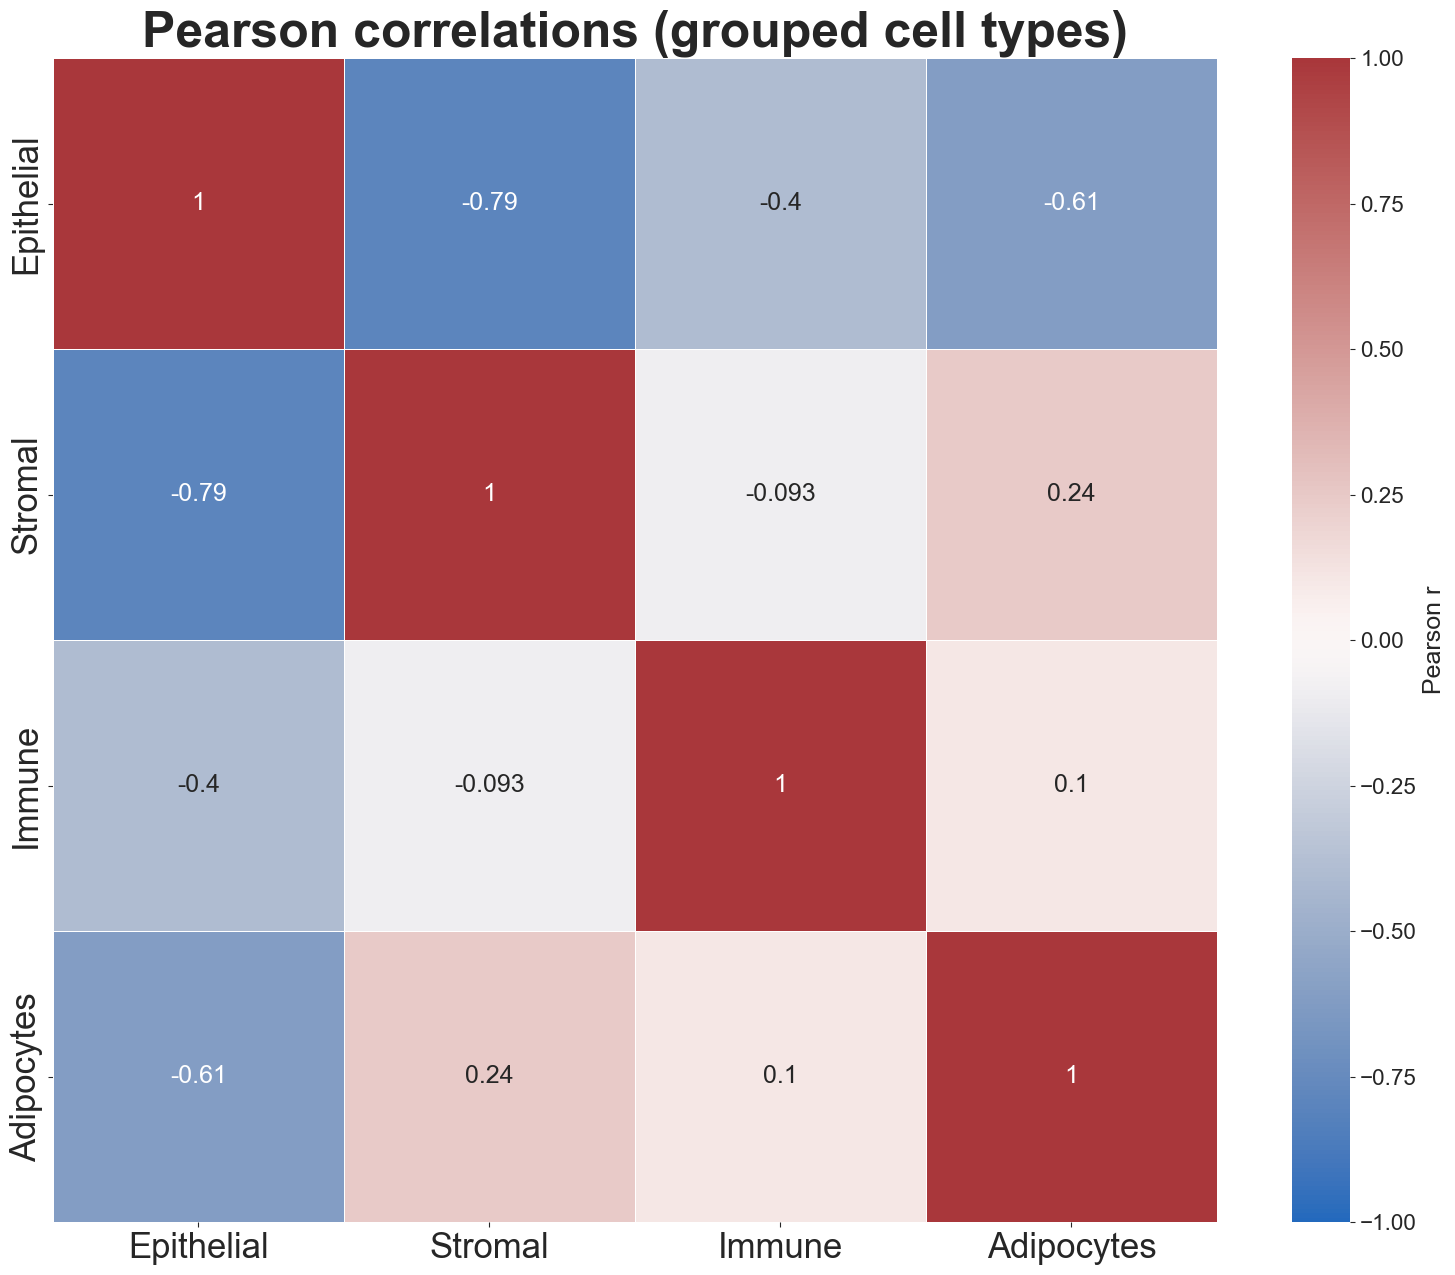

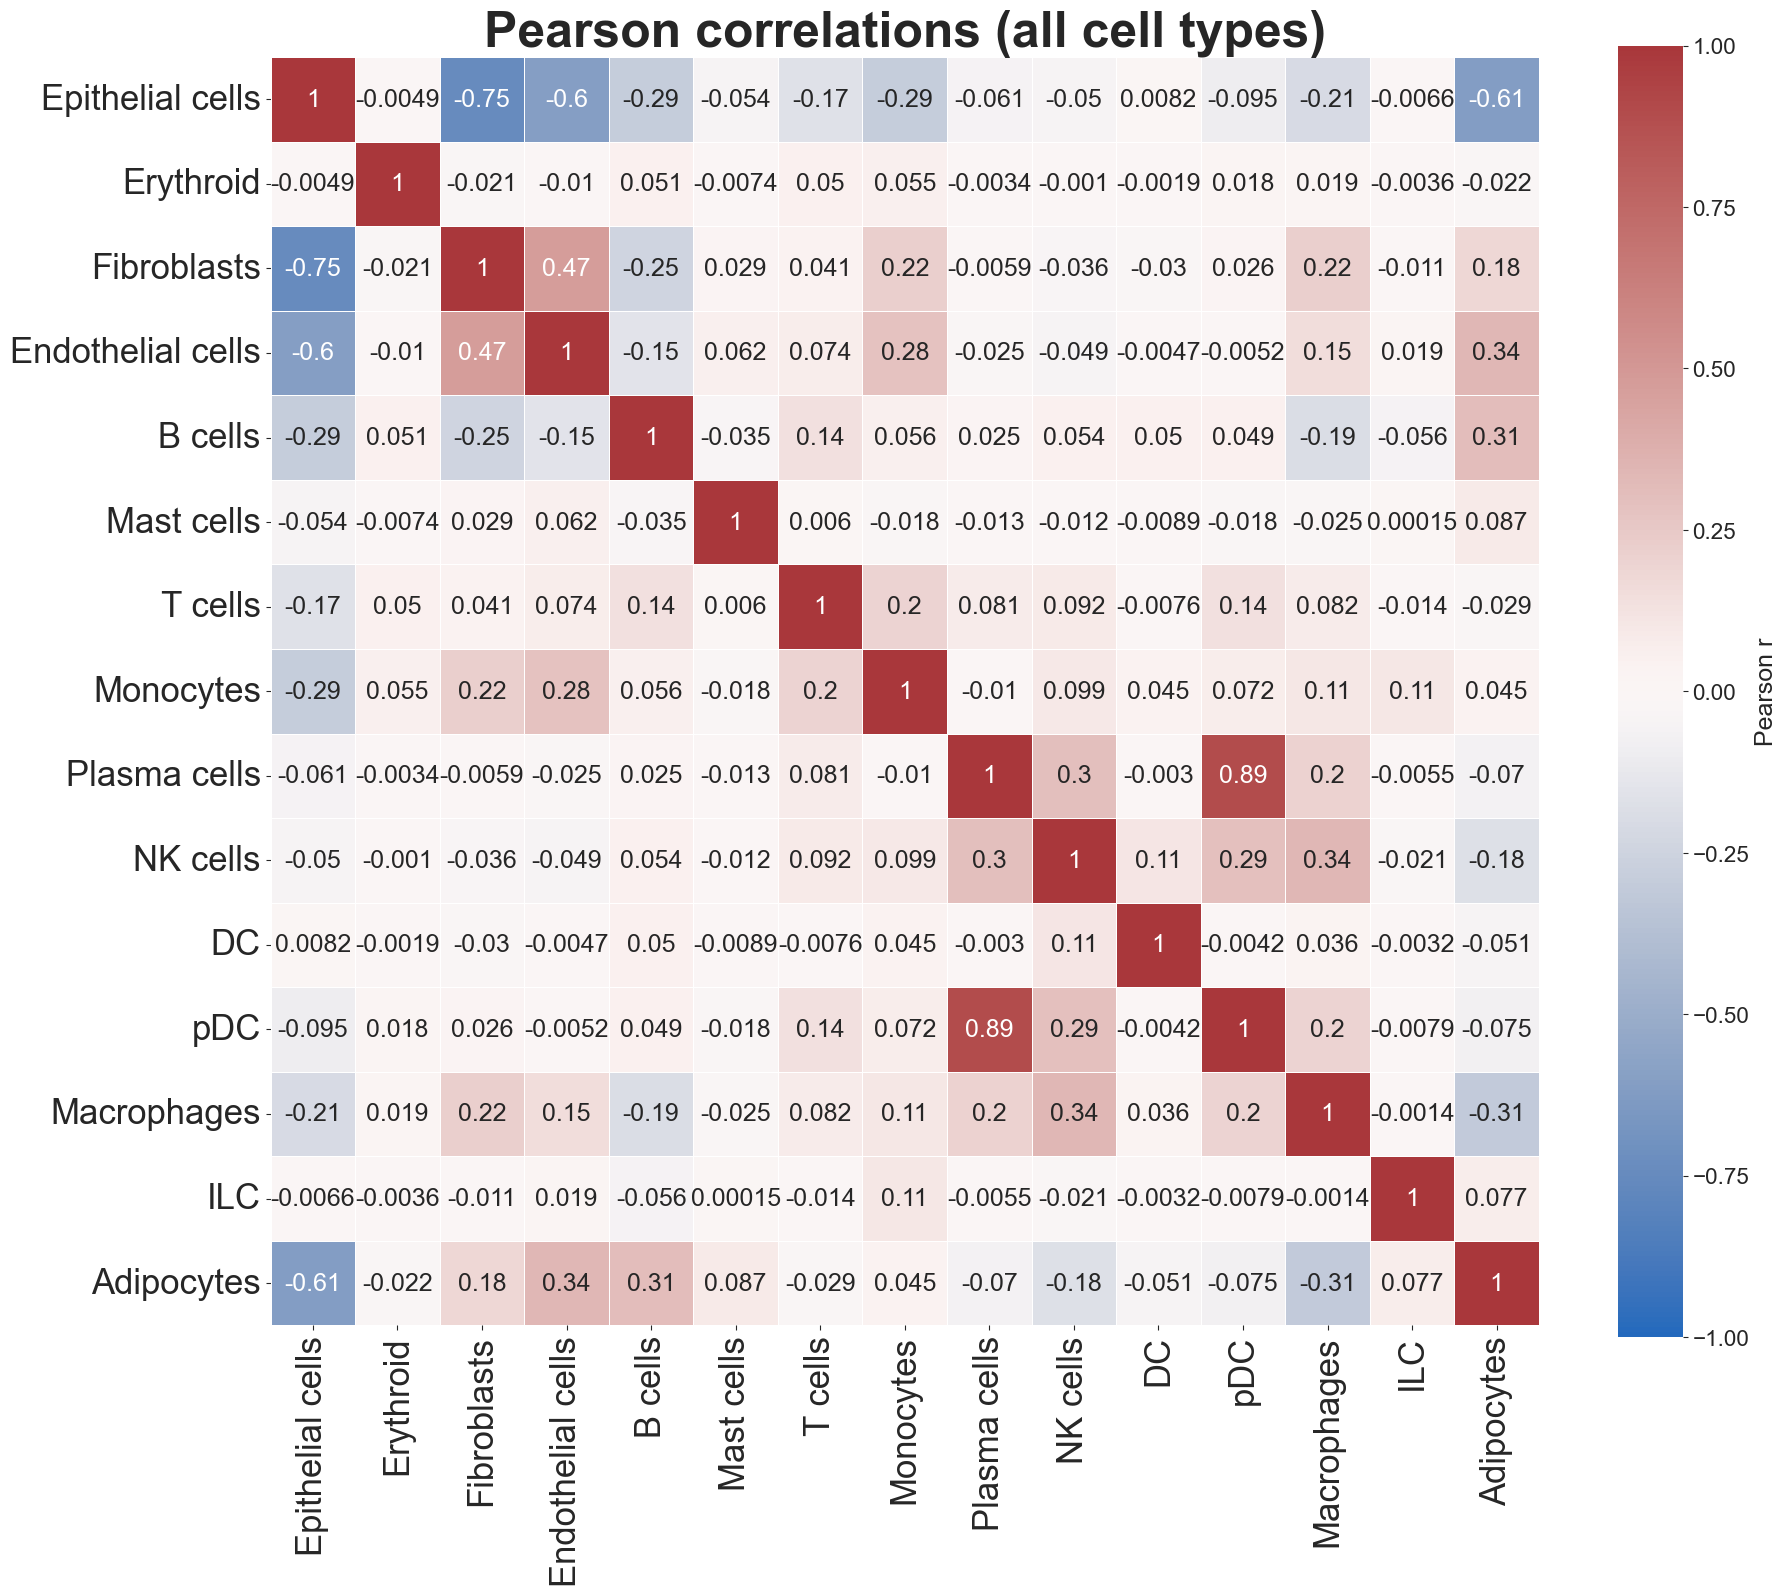

In [8]:
# --------------------------------------------------------------------------
# 2.1  Spearman correlation matrix 
# --------------------------------------------------------------------------

hp.corr_mat_sp(props, title="Spearman correlations (grouped cell types)")
hp.corr_mat_sp(props_all, title="Spearman correlations (all cell types)")


# --------------------------------------------------------------------------
# 2.2  Pearson correlation matrix 
# --------------------------------------------------------------------------

hp.corr_mat_pe(props, title="Pearson correlations (grouped cell types)")
hp.corr_mat_pe(props_all, title="Pearson correlations (all cell types)")